In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Step 1: Load the dataset (replace the path with your actual file path)
df = pd.read_csv(r"C:\Users\siyag\Downloads\survey data\Customer-survey-data.csv")

In [19]:
# Step 2: Rename columns (if needed)
df.columns = ['Customer', 'OverallSatisfaction', 'FoodQuality', 'SpeedSatisfaction', 'OrderAccuracy']

In [20]:
# Step 3: Convert 'OrderAccuracy' column to numeric (1 for 'Yes', 0 for 'No')
df['OrderAccuracy'] = df['OrderAccuracy'].map({'Yes': 1, 'No': 0})

# Step 4: Check the class distribution of 'OrderAccuracy'
print(f"Class distribution in 'OrderAccuracy':\n{df['OrderAccuracy'].value_counts()}")

Class distribution in 'OrderAccuracy':
OrderAccuracy
1.0    7111
0.0    2845
Name: count, dtype: int64


In [21]:
# Step 5: Replace null values in 'OrderAccuracy' with random 'Yes' or 'No' (True/False)
# Get the distribution of 1/0 values in the target column
order_accuracy_dist = df['OrderAccuracy'].dropna().value_counts(normalize=True)


In [22]:
# Create a function to randomly replace NaN values
def random_fill_order_accuracy(df, dist):
    missing_values_count = df['OrderAccuracy'].isnull().sum()
    random_values = np.random.choice(dist.index, size=missing_values_count, p=dist.values)
    df.loc[df['OrderAccuracy'].isnull(), 'OrderAccuracy'] = random_values

In [23]:
# Apply the function
random_fill_order_accuracy(df, order_accuracy_dist)

In [24]:
# Step 6: Check if the null values are replaced
print(f"Missing values in each column after filling 'OrderAccuracy' column:\n{df.isnull().sum()}")


Missing values in each column after filling 'OrderAccuracy' column:
Customer                 0
OverallSatisfaction    418
FoodQuality            252
SpeedSatisfaction      239
OrderAccuracy            0
dtype: int64


In [25]:
# Step 7: Define features (X) and target (y)
X = df[['FoodQuality', 'SpeedSatisfaction', 'OverallSatisfaction']]  # Features
y = df['OrderAccuracy']  # Target

# Step 8: Preprocessing for the models
# Define preprocessing steps
numerical_features = ['FoodQuality', 'SpeedSatisfaction', 'OverallSatisfaction']
categorical_features = []  # No categorical features to preprocess

In [26]:
# Preprocessing for numerical data: impute missing values with median and standardize
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

In [27]:
# Step 9: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [30]:
# Convert the numpy arrays back to pandas DataFrame to preserve column names
X_train_imputed = pd.DataFrame(X_train_imputed, columns=numerical_features)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=numerical_features)

In [31]:
# Model 1: Logistic Regression
print("Training Logistic Regression...")
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

logreg_pipeline.fit(X_train_imputed, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test_imputed)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Confusion Matrix:\n{cm_logreg}")
print(f"Classification Report:\n{report_logreg}")

Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.4995291902071563
Confusion Matrix:
[[336 259]
 [804 725]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.29      0.56      0.39       595
         1.0       0.74      0.47      0.58      1529

    accuracy                           0.50      2124
   macro avg       0.52      0.52      0.48      2124
weighted avg       0.61      0.50      0.52      2124



In [32]:
# Model 2: Decision Tree Classifier
print("\nTraining Decision Tree...")
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train_imputed, y_train)
y_pred_dt = dt_pipeline.predict(X_test_imputed)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_dt}")
print(f"Confusion Matrix:\n{cm_dt}")
print(f"Classification Report:\n{report_dt}")


Training Decision Tree...

Decision Tree Results:
Accuracy: 0.7198681732580038
Confusion Matrix:
[[   0  595]
 [   0 1529]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       595
         1.0       0.72      1.00      0.84      1529

    accuracy                           0.72      2124
   macro avg       0.36      0.50      0.42      2124
weighted avg       0.52      0.72      0.60      2124



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Model 3: Support Vector Machine (SVM)
print("\nTraining Support Vector Machine (SVM)...")
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(class_weight='balanced'))
])

svm_pipeline.fit(X_train_imputed, y_train)
y_pred_svm = svm_pipeline.predict(X_test_imputed)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("\nSupport Vector Machine (SVM) Results:")
print(f"Accuracy: {accuracy_svm}")
print(f"Confusion Matrix:\n{cm_svm}")
print(f"Classification Report:\n{report_svm}")


Training Support Vector Machine (SVM)...

Support Vector Machine (SVM) Results:
Accuracy: 0.5282485875706214
Confusion Matrix:
[[351 244]
 [758 771]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.32      0.59      0.41       595
         1.0       0.76      0.50      0.61      1529

    accuracy                           0.53      2124
   macro avg       0.54      0.55      0.51      2124
weighted avg       0.64      0.53      0.55      2124



In [34]:
# Model 4: Random Forest Classifier
print("\nTraining Random Forest...")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

rf_pipeline.fit(X_train_imputed, y_train)
y_pred_rf = rf_pipeline.predict(X_test_imputed)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{cm_rf}")
print(f"Classification Report:\n{report_rf}")


Training Random Forest...

Random Forest Results:
Accuracy: 0.5470809792843692
Confusion Matrix:
[[308 287]
 [675 854]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.31      0.52      0.39       595
         1.0       0.75      0.56      0.64      1529

    accuracy                           0.55      2124
   macro avg       0.53      0.54      0.52      2124
weighted avg       0.63      0.55      0.57      2124



In [35]:
# Model 5: Naive Bayes
print("\nTraining Naive Bayes...")
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

nb_pipeline.fit(X_train_imputed, y_train)
y_pred_nb = nb_pipeline.predict(X_test_imputed)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("\nNaive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print(f"Confusion Matrix:\n{cm_nb}")
print(f"Classification Report:\n{report_nb}")


Training Naive Bayes...

Naive Bayes Results:
Accuracy: 0.7198681732580038
Confusion Matrix:
[[   0  595]
 [   0 1529]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       595
         1.0       0.72      1.00      0.84      1529

    accuracy                           0.72      2124
   macro avg       0.36      0.50      0.42      2124
weighted avg       0.52      0.72      0.60      2124



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Step 11: Visualize the accuracy comparison for the models
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_logreg, accuracy_dt, accuracy_svm, accuracy_rf, accuracy_nb]

C:\Users\siyag\AppData\Local\Temp\ipykernel_15140\4089808091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


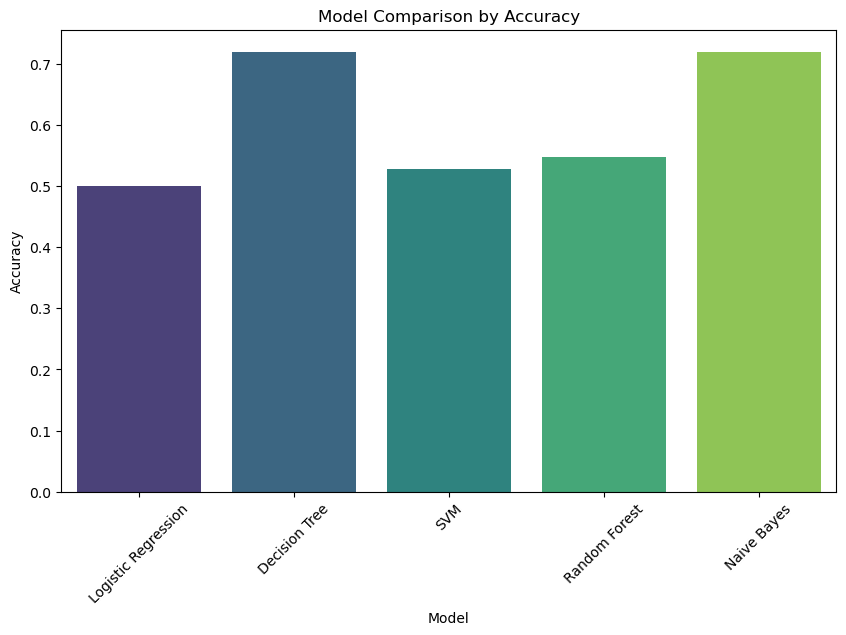

In [37]:

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Comparison by Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

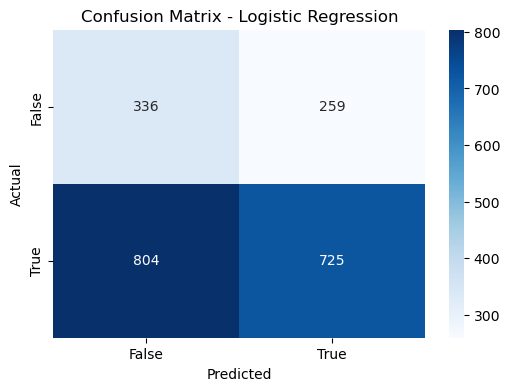

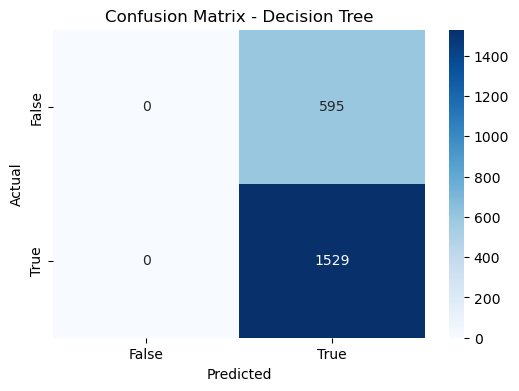

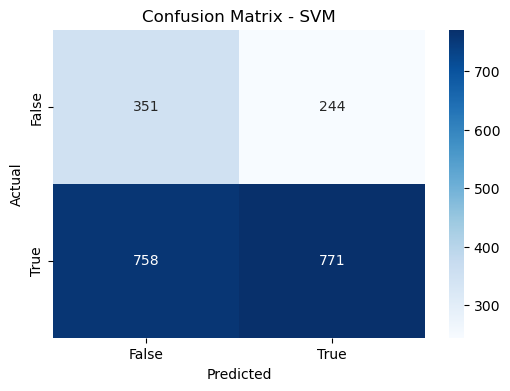

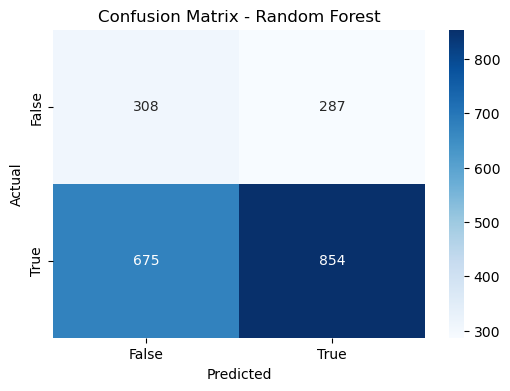

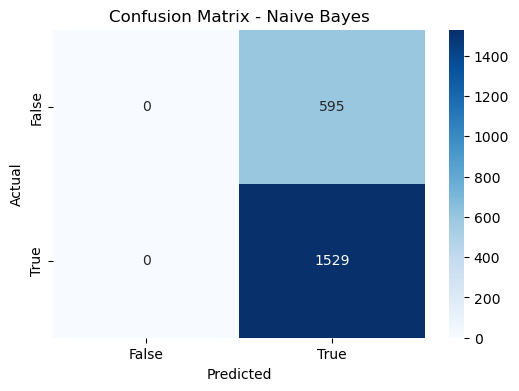

In [39]:
# Step 12: Visualize the confusion matrices for all models
for model_name, cm in zip(model_names, [cm_logreg, cm_dt, cm_svm, cm_rf, cm_nb]):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [42]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate and visualize the classification report as a heatmap
def plot_classification_report_heatmap(model_name, y_true, y_pred):
    # Generate classification report as a dictionary
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert classification report dictionary to DataFrame
    report_df = pd.DataFrame(report).transpose()  # Transpose to get classes as rows and metrics as columns
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
    plt.title(f'Classification Report Heatmap - {model_name}')
    plt.show()

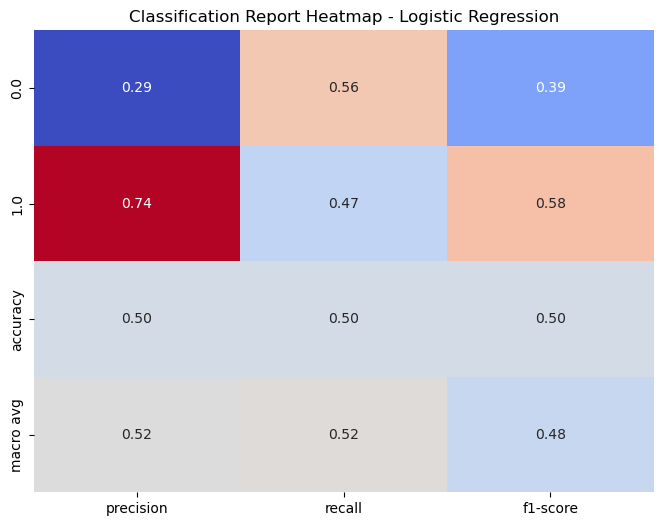

In [43]:
# Visualize Classification Report Heatmap for Logistic Regression
plot_classification_report_heatmap('Logistic Regression', y_test, y_pred_logreg)

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


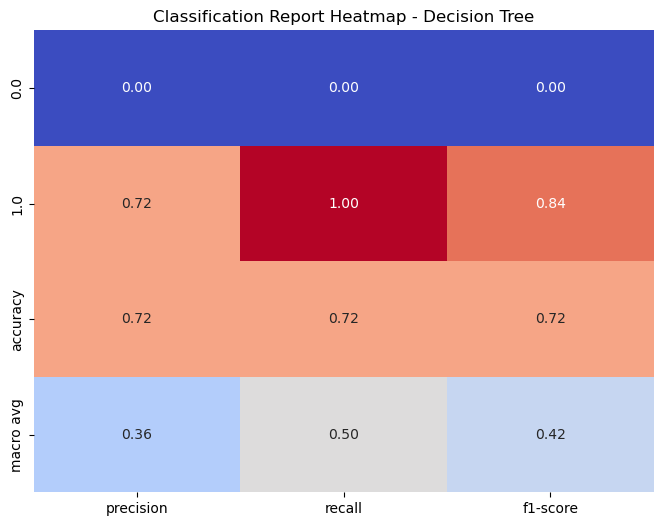

In [44]:
# Visualize Classification Report Heatmap for Decision Tree
plot_classification_report_heatmap('Decision Tree', y_test, y_pred_dt)

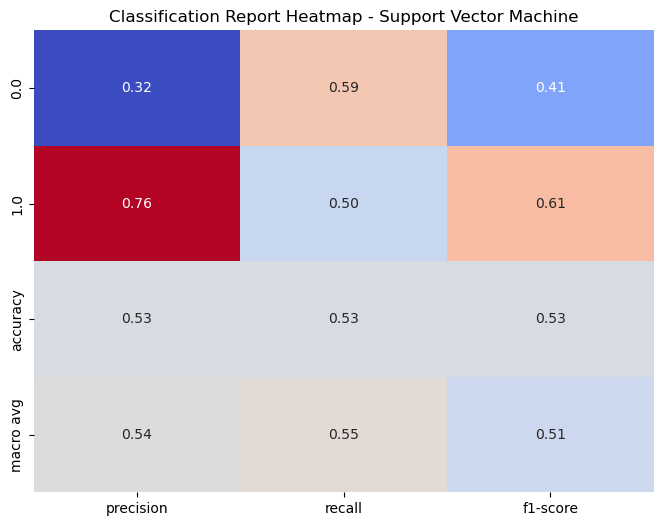

In [45]:
# Visualize Classification Report Heatmap for SVM
plot_classification_report_heatmap('Support Vector Machine', y_test, y_pred_svm)